In [32]:
# Linear Regression with Gradient Descent

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import math

In [33]:
#jupyter notebook에서 그래프 그리기 위한 inline 처리
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [34]:
#data Normalization function Define
def dataNormalization(x):
    x_average = 0 #Data 평균값
    x_var = 0     #Data 분산값
    x_delta = 0
    x_prime = []  #Data 정규화
    
    x_average = sum(x) / len(x)
    
    for k in x:
        x_delta = x_delta + (k - x_average)**2
    x_var = x_delta / len(x)
    #x_delta = x_delta / len(x)
    for k in range(len(x)):
        x_prime.append((x[k]-x_average)/(math.sqrt(x_var)))
    print("평균:",x_average,"분산:",x_var)
    return x_prime

In [35]:
# L2 gradient function Define
def L2gradient(X, Y, a, b):
    loss = 0
    gradient_a = 0
    gradient_b = 0
    for k in range(len(X)):
        mk = X[k] * a + b
        ek = Y[k] - mk
        loss += ek ** 2
        gradient_a += ek * (-X[k])
        gradient_b += ek * (-1)
        
    return loss, gradient_a, gradient_b

In [36]:
# L1 gradient function Define
def L1gradient(X, Y, a, b):
    loss = 0
    gradient_a = 0
    gradient_b = 0
    for k in range(len(X)):
        mk = X[k] * a + b
        ek = Y[k] - mk
        loss += abs(ek)
        if ek > 0:
            gradient_a += (-X[k])
            gradient_b += (-1)
        elif ek < 0:
            gradient_a += (X[k])
            gradient_b += 1
        elif ek == 0:
            gradient_a += 0
            gradient_b += 0
            
    return loss, gradient_a, gradient_b

In [37]:
#f(x) = ax + b 에서 a 와 b 초기값 정의
a_true = random.randint(1, 10)
b_true = random.randint(1, 10)

In [38]:
print("a는 ?",a_true,"\n","b는 ?",b_true)

a는 ? 6 
 b는 ? 6


In [39]:
#Random data x ,Hypothesis Define
x = [random.randint(0, 10) for x in range(1000)]
x = dataNormalization(x) # data normalization
y = [a_true * xi+b_true for xi in x]
print(x)
print(y)

평균: 5.054 분산: 9.949084000000008
[0.29991596709543866, -1.6022994690278514, 0.29991596709543866, -1.6022994690278514, 0.9339877791365353, 0.9339877791365353, -0.9682276569867547, -0.6511917509662064, 0.29991596709543866, -1.6022994690278514, -0.9682276569867547, -0.6511917509662064, 1.2510236851570837, 0.29991596709543866, -0.33415584494565803, 1.568059591177632, 1.2510236851570837, 0.616951873115987, -0.33415584494565803, 0.616951873115987, 0.29991596709543866, 0.616951873115987, -0.9682276569867547, 0.29991596709543866, -0.33415584494565803, 0.29991596709543866, 0.29991596709543866, 0.29991596709543866, -1.6022994690278514, -0.017119938925109695, -0.6511917509662064, 1.568059591177632, -1.6022994690278514, -1.6022994690278514, -0.6511917509662064, -0.6511917509662064, -0.9682276569867547, 1.2510236851570837, -0.017119938925109695, -0.9682276569867547, -1.285263563007303, -0.017119938925109695, -1.6022994690278514, -0.017119938925109695, -1.6022994690278514, 1.568059591177632, 0.933987

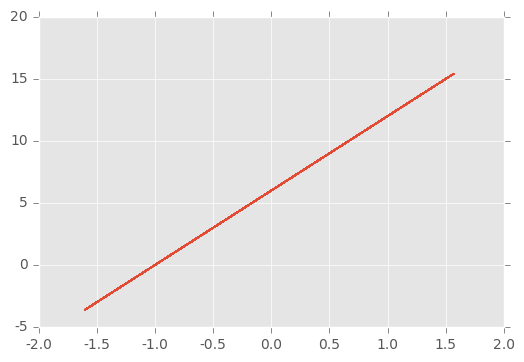

In [40]:
#간단하게 True 그래프 그려보기
plt.plot(x,y)

In [41]:
#fitting ->초기값도 잘바꿔서 테스트해볼수 있다
a_hat = 1.
b_hat = 1.
learning_rate = 1e-4
loss_graph = []
#update a_hat,b_hat
for iter in range(10000):
    loss,gradient_a,gradient_b = L1gradient(x, y, a_hat, b_hat) #L2gradient로 바꿔서 테스트
    loss_graph.append(loss)
    print("iter %d : loss = %f, a=%f b=%f" % (iter,loss,a_hat,b_hat))
    a_hat = a_hat - gradient_a * learning_rate
    b_hat = b_hat - gradient_b * learning_rate

iter 0 : loss = 5793.736904, a=1.000000 b=1.000000
iter 1 : loss = 5725.660216, a=1.051075 b=1.064800
iter 2 : loss = 5657.583527, a=1.102149 b=1.129600
iter 3 : loss = 5589.506838, a=1.153224 b=1.194400
iter 4 : loss = 5521.430150, a=1.204299 b=1.259200
iter 5 : loss = 5453.353461, a=1.255374 b=1.324000
iter 6 : loss = 5385.276772, a=1.306448 b=1.388800
iter 7 : loss = 5317.200083, a=1.357523 b=1.453600
iter 8 : loss = 5249.123395, a=1.408598 b=1.518400
iter 9 : loss = 5181.046706, a=1.459673 b=1.583200
iter 10 : loss = 5112.970017, a=1.510747 b=1.648000
iter 11 : loss = 5046.846777, a=1.561822 b=1.712800
iter 12 : loss = 4979.824853, a=1.631874 b=1.758000
iter 13 : loss = 4912.275074, a=1.682949 b=1.822800
iter 14 : loss = 4846.679689, a=1.753001 b=1.868000
iter 15 : loss = 4778.603000, a=1.804076 b=1.932800
iter 16 : loss = 4712.634895, a=1.855150 b=1.997600
iter 17 : loss = 4645.457836, a=1.925202 b=2.042800
iter 18 : loss = 4578.063192, a=1.976277 b=2.107600
iter 19 : loss = 4512.

iter final : loss = 6.520000e+01, a=5.980723 b=5.965200


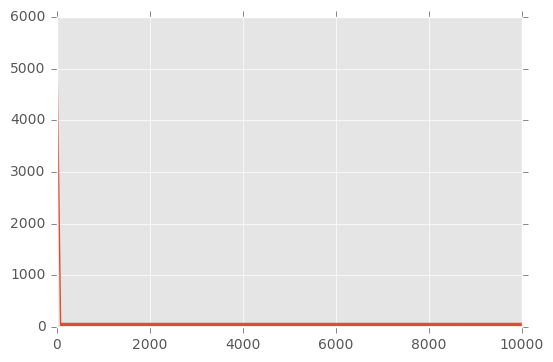

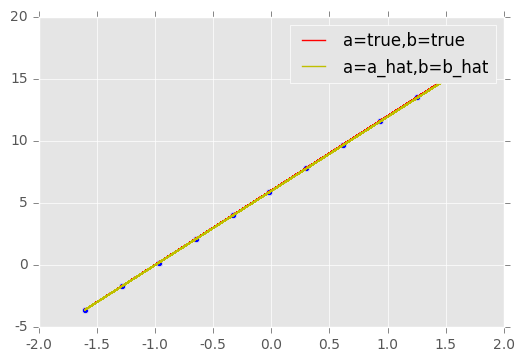

In [42]:
print("iter final : loss = %e, a=%f b=%f" % (loss,a_hat,b_hat))
plt.plot(loss_graph)
plt.show()

y_ = [X*a_hat + b_hat for X in x]
plt.scatter(x,y)
plt.plot(x,y, 'r',label='a=true,b=true')
plt.plot(x,y_, 'y', label='a=a_hat,b=b_hat')
plt.legend()
plt.show()